In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np


In [7]:
df= pd.read_csv("/content/drive/MyDrive/Lab_performance/Breast Cancer Wisconsin (Diagnostic) Data Set.csv")

In [8]:
#handle missing value

missing_counts = df.isna().sum()
print(missing_counts[missing_counts > 0])


Unnamed: 32    569
dtype: int64


In [9]:
#Duplicate rows remove

duplicate_count = df.duplicated().sum()
print("Number of duplicate rows found:", duplicate_count)
df_cleaned = df.drop_duplicates(keep='first')
df_cleaned.reset_index(drop=True, inplace=True)

print("New shape after removing duplicates:", df_cleaned.shape)



Number of duplicate rows found: 0
New shape after removing duplicates: (569, 33)


In [10]:
# Correct data type

df['diagnosis'] = df.get('diagnosis').astype('category')
print(df['diagnosis'].value_counts())


diagnosis
B    357
M    212
Name: count, dtype: int64


In [11]:
# Identify categorical & numeric columns

cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include='number').columns

num_cols = num_cols.drop('id') if 'id' in num_cols else num_cols

print("Categorical columns:", list(cat_cols))
print("Total numeric columns:", len(num_cols))


Categorical columns: ['diagnosis']
Total numeric columns: 31


In [12]:
# Label Encoding for binary categorical features

from sklearn.preprocessing import LabelEncoder

if 'diagnosis' in df and df['diagnosis'].nunique() == 2:
    df['diagnosis_le'] = LabelEncoder().fit_transform(df['diagnosis'])
    print(df['diagnosis'].unique())


['M', 'B']
Categories (2, object): ['B', 'M']


In [13]:
#One-Hot Encoding for multi-class categorical features

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

multi_class_cols = ['area_category', 'texture_group']
multi_class_cols = [col for col in multi_class_cols if col in df.columns]

if multi_class_cols:
    print("Applying One-Hot Encoding on:", multi_class_cols)

    ohe = OneHotEncoder(sparse=False, drop='first')
    encoded = ohe.fit_transform(df[multi_class_cols])

    encoded_df = pd.DataFrame(
        encoded,
        columns=ohe.get_feature_names_out(multi_class_cols),
        index=df.index
    )

    df = df.drop(columns=multi_class_cols)
    df = pd.concat([df, encoded_df], axis=1)

else:
    print("⚠ No multi-class categorical columns found for One-Hot Encoding.")

df.info()


⚠ No multi-class categorical columns found for One-Hot Encoding.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  

In [14]:
# Feature Scaling (StandardScaler)

from sklearn.preprocessing import StandardScaler

remove_cols = [ "diagnosis_le", "Unnamed: 32"]

numeric_cols = [col for col in df.columns if col not in remove_cols]

numeric_cols = df[numeric_cols].select_dtypes(include='number').columns.tolist()

print("Numeric Columns to Scale:", numeric_cols)

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Scaling Completed!")


Numeric Columns to Scale: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Scaling Completed!


In [15]:
#Train–Test Split

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df= pd.read_csv("/content/drive/MyDrive/Lab_performance/Breast Cancer Wisconsin (Diagnostic) Data Set.csv")
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

le = LabelEncoder()
df['diagnosis_le'] = le.fit_transform(df['diagnosis'])
print("Label Classes:", le.classes_)      # ['B' 'M']


numeric_cols = [c for c in df.select_dtypes(include='number').columns
                if c not in ['id', 'diagnosis_le']]
print("Numeric Columns to Scale:", numeric_cols)

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Scaling Completed!\n")

X = df.drop(columns=['id', 'diagnosis', 'diagnosis_le'])
y = df['diagnosis_le']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

print("\nTrain class distribution:\n",
      y_train.value_counts(normalize=True))
print("\nTest class distribution:\n",
      y_test.value_counts(normalize=True))


Label Classes: ['B' 'M']
Numeric Columns to Scale: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Scaling Completed!

Train shape: (455, 30) (455,)
Test shape: (114, 30) (114,)

Train class distribution:
 diagnosis_le
0    0.626374
1    0.373626
Name: proportion, dtype: float64

Test class distribution:
 diagnosis_le
0    0.631579
1    0.368421
Name: proportion, dtype: float64


In [16]:
#TRAIN FIVE ML MODELS

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
df= pd.read_csv("/content/drive/MyDrive/Lab_performance/Breast Cancer Wisconsin (Diagnostic) Data Set.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.fillna(df.median(numeric_only=True))
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
models = {
"Logistic Regression": LogisticRegression(max_iter=500),
"SVM": SVC(),
"KNN": KNeighborsClassifier(),
"Random Forest": RandomForestClassifier(),
"Decision Tree": DecisionTreeClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9737
SVM Accuracy: 0.9825
KNN Accuracy: 0.9474
Random Forest Accuracy: 0.9649
Decision Tree Accuracy: 0.9123


In [17]:
#Confusion Matrix + Classification Report (Precision, Recall, F1-score)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"\n============================")
    print(f"Model: {model_name}")
    print("============================")

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



Model: Logistic Regression
Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



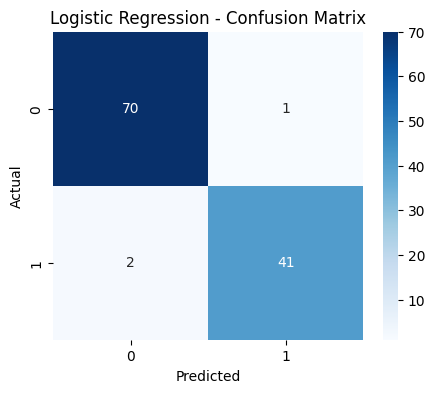


Model: SVM
Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



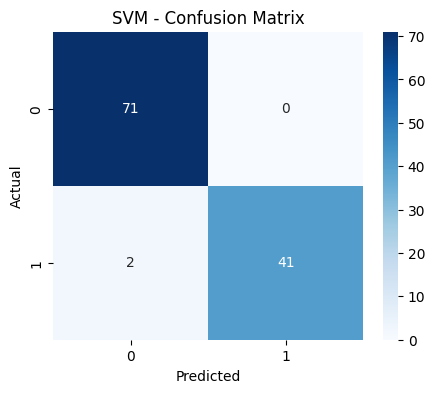


Model: KNN
Accuracy: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



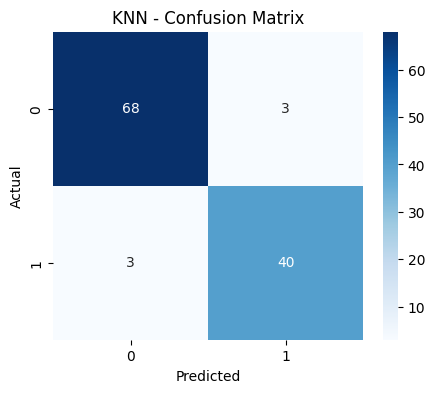


Model: Random Forest
Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



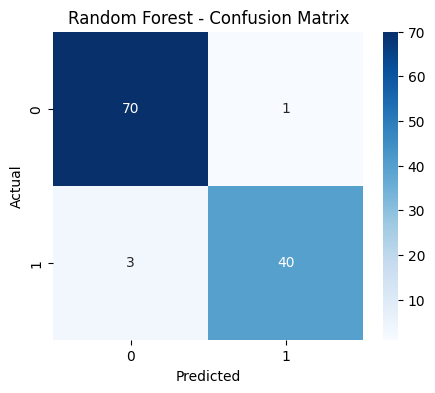


Model: Decision Tree
Accuracy: 0.9122807017543859

Classification Report:
              precision    recall  f1-score   support

           B       0.94      0.92      0.93        71
           M       0.87      0.91      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



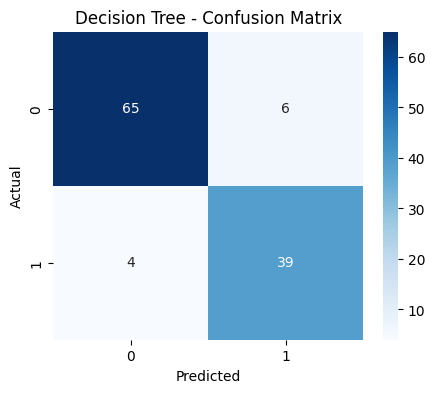

In [18]:
for model_name, model in models.items():
    evaluate_model(model, X_test, y_test, model_name)


In [19]:
#ROC Curve

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, model_name):
    # Probability predictions (required for ROC)
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Check mapping:
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'B': np.int64(0), 'M': np.int64(1)}


In [21]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


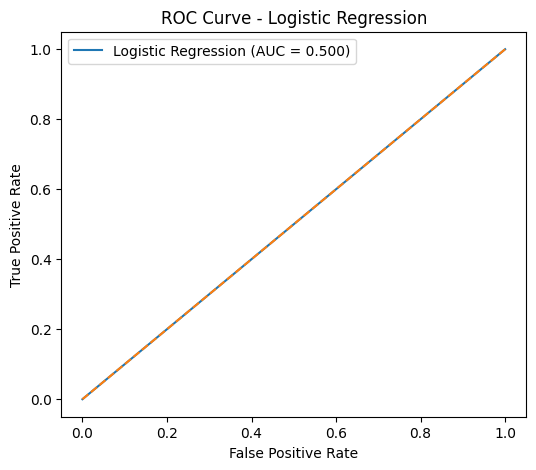

In [22]:
plot_roc_curve(models["Logistic Regression"], X_test, y_test, "Logistic Regression")

In [23]:
#Loss vs Validation Loss Curve
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    plt.figure(figsize=(6,5))
    plt.plot(train_sizes, train_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_mean, label="Validation Accuracy")
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

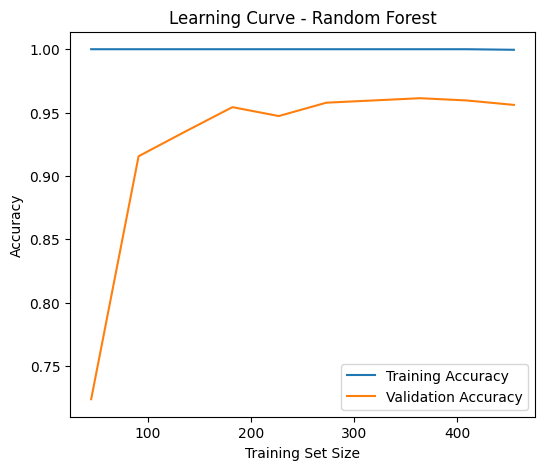

In [24]:
plot_learning_curve(models["Random Forest"], X, y, "Random Forest")

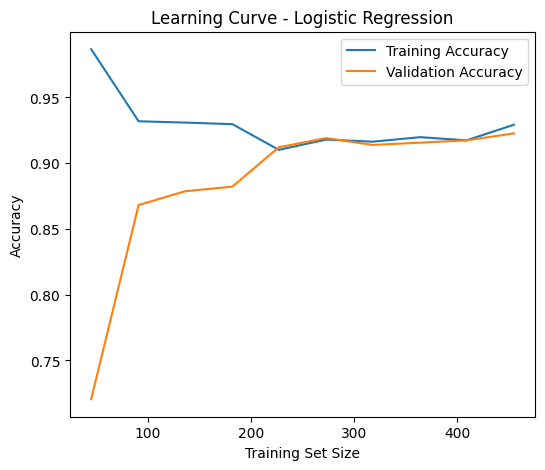

In [25]:
plot_learning_curve(models["Logistic Regression"], X, y, "Logistic Regression")

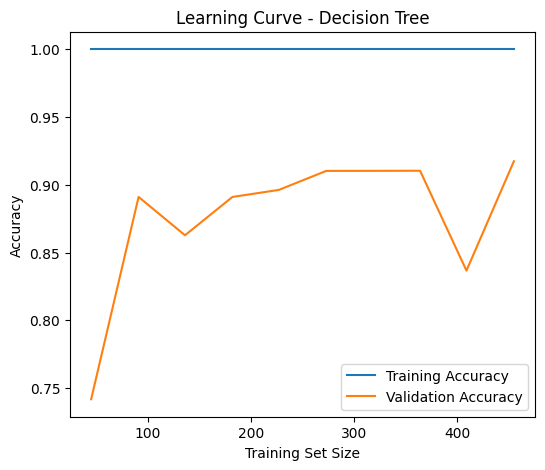

In [26]:
plot_learning_curve(models["Decision Tree"], X, y, "Decision Tree")

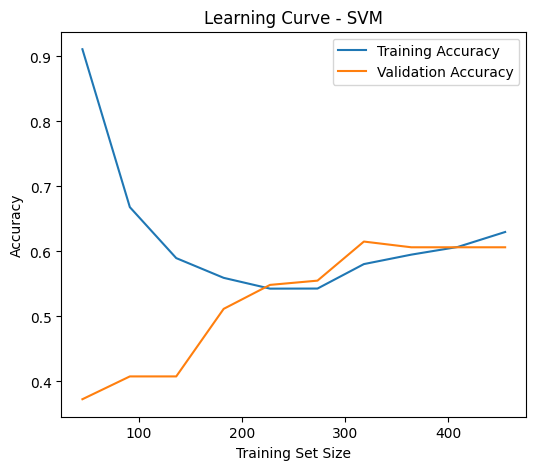

In [27]:
plot_learning_curve(models["SVM"], X, y, "SVM")

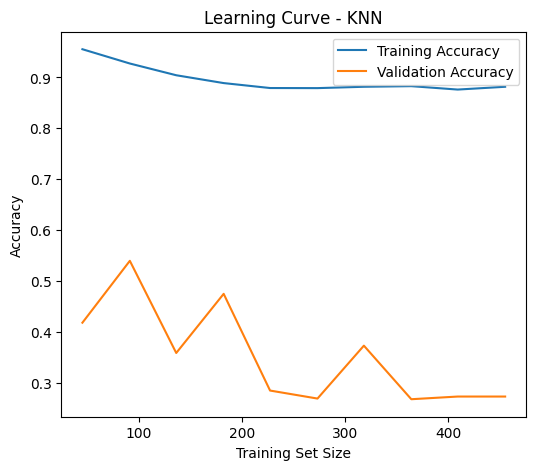

In [28]:
plot_learning_curve(models["KNN"], X, y, "KNN")